<a href="https://colab.research.google.com/github/autumnxu/nishiki-e/blob/main/nishiki_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/autumnxu/nishiki-e.git
!ls

Cloning into 'nishiki-e'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.
nishiki-e  sample_data


The type of this input is <class 'numpy.ndarray'>
Shape: (1312, 2038, 3)


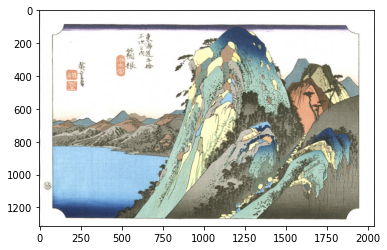

In [16]:
import matplotlib.pyplot as plt
from matplotlib import colors
import cv2 as opencv
import numpy as np
image = opencv.imread('nishiki-e/Artelino.png')
image = opencv.cvtColor(image, opencv.COLOR_BGR2RGB)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

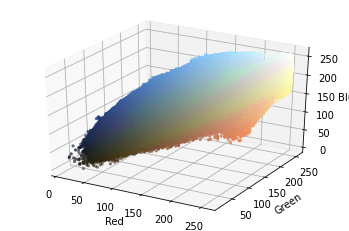

In [10]:
# color in 3D space
r, g, b = opencv.split(image)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = image.reshape((np.shape(image)[0]*np.shape(image)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

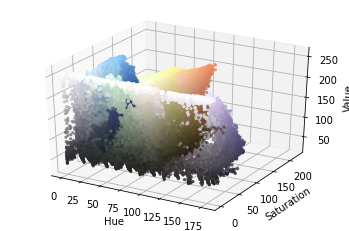

In [11]:
# color in HSV space 
imhsv = opencv.cvtColor(image, opencv.COLOR_BGR2HSV)
h, s, v = opencv.split(imhsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

classify by color region: blue, yellow, red, black, white

---

Estimate local smoothness

---
Decompose into semantic areas of the print in greyscale

63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
233
234
235
236
237
238
239
240
241
242
248
249
250
251
252
253
254
255


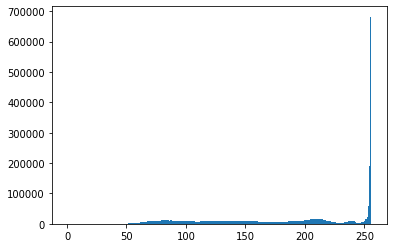

In [3]:
# histograms/ semantic correlation with color
# here yields the histogram distribution
imgray = opencv.cvtColor(image, opencv.COLOR_BGR2GRAY)
hist = opencv.calcHist([imgray],[0],None,[256],[0,256])
colors = np.where(hist>5000)
img_number = 0
for color in colors[0]:
    print(color)
    split_image = image.copy()
    split_image[np.where(imgray != color)] = 0
    # opencv.imwrite(str(img_number)+".jpg",split_image)
    img_number+=1
plt.hist(imgray.ravel(),256,[0,256])
plt.savefig('plt')
plt.show()

True

<Figure size 432x288 with 0 Axes>

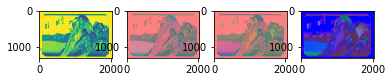

In [3]:
# display image in all 4 color spaces
# convert image to greyscale
imgray = opencv.cvtColor(image, opencv.COLOR_BGR2GRAY)
# convert image to LAB colorspace
imlab = opencv.cvtColor(image, opencv.COLOR_BGR2LAB)
# convert image to YUV colorspace: take human perception into account
imyuv = opencv.cvtColor(image, opencv.COLOR_BGR2YUV)
# convert image to hue, saturation, value colorspace
imhsv = opencv.cvtColor(image, opencv.COLOR_BGR2HSV)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,4)

# use the created array to output your multiple images: stacked 4 images vertically
axarr[0].imshow(imgray)
axarr[1].imshow(imlab)
axarr[2].imshow(imyuv)
axarr[3].imshow(imhsv)

# the following save the modified image as the name in quotes
opencv.imwrite("YUV.png", imyuv)
opencv.imwrite("LAB.png", imlab)
opencv.imwrite("HSV.png", imhsv)


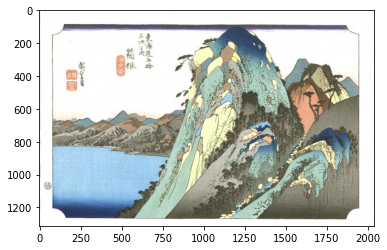

In [6]:
# currently not needed
ret, thresh = opencv.threshold(imgray, 127, 255, opencv.THRESH_OTSU)
# print(ret)
# print(thresh)
contours, hierarchy = opencv.findContours(thresh, opencv.RETR_TREE, opencv.CHAIN_APPROX_SIMPLE)
cnt = contours[4]
# opencv.drawContours(image, [cnt], -1, (0,255,0), 4)
opencv.drawContours(image, contours, 2, (0,255,0), 4)
plt.imshow(image)

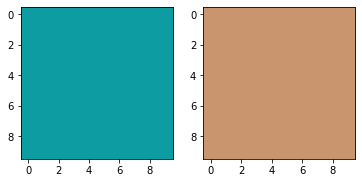

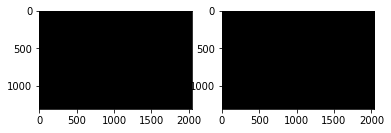

In [31]:
# separate by color region: blue??? not really working 
# light_blue = (172.5000, 52.8634, 89.0196) # almost aqua 
# dark_blue = (211.9481, 92.7711, 65.0980)
light = (129, 235, 162)
dark = (18, 113, 201)
from matplotlib.colors import hsv_to_rgb
low_square = np.full((10, 10, 3), light, dtype=np.uint8) / 255.0
dark_square = np.full((10, 10, 3), dark, dtype=np.uint8) / 255.0
# display the testing color range
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(low_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dark_square))
plt.show()
# superimpose the masks to the original image
mask = opencv.inRange(image, light, dark)
result = opencv.bitwise_and(image, image, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()
# plt.savefig('ne.png')